In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Lasso
from sklearn import metrics

import math

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 
              'sqft_living15':float, 'grade':int, 'yr_renovated':int, 
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float,
              'sqft_lot15':float, 'sqft_living':float, 'floors':float, 
              'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [4]:
data = pd.read_csv("C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/kc_house_data.csv", dtype=dtype_dict)
sales = data

In [5]:
sales['sqft_living_sqrt'] = sales['sqft_living'].apply(math.sqrt)
sales['sqft_lot_sqrt'] = sales['sqft_lot'].apply(math.sqrt)
sales['bedrooms_square'] = sales['bedrooms']*sales['bedrooms']
sales['floors_square'] = sales['floors']*sales['floors']

In [6]:
all_features = ['bedrooms', 'bedrooms_square',
            'bathrooms',
            'sqft_living', 'sqft_living_sqrt',
            'sqft_lot', 'sqft_lot_sqrt',
            'floors', 'floors_square',
            'waterfront', 'view', 'condition', 'grade',
            'sqft_above',
            'sqft_basement',
            'yr_built', 'yr_renovated']

In [7]:
model_all = Lasso(alpha=5e2, normalize=True) # set parameters
model_all.fit(sales[all_features], sales['price']) # learn weights

Lasso(alpha=500.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
model_all.coef_

array([     0.        ,      0.        ,      0.        ,    134.43931396,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,  24750.00458561,      0.        ,
        61749.10309071,      0.        ,      0.        ,     -0.        ,
            0.        ])

In [9]:
testing = pd.read_csv('C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/wk3_kc_house_test_data.csv', dtype=dtype_dict)
training = pd.read_csv('C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation = pd.read_csv('C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/wk3_kc_house_valid_data.csv', dtype=dtype_dict)

In [10]:
testing['sqft_living_sqrt'] = testing['sqft_living'].apply(math.sqrt)
testing['sqft_lot_sqrt'] = testing['sqft_lot'].apply(math.sqrt)
testing['bedrooms_square'] = testing['bedrooms']*testing['bedrooms']
testing['floors_square'] = testing['floors']*testing['floors']

training['sqft_living_sqrt'] = training['sqft_living'].apply(math.sqrt)
training['sqft_lot_sqrt'] = training['sqft_lot'].apply(math.sqrt)
training['bedrooms_square'] = training['bedrooms']*training['bedrooms']
training['floors_square'] = training['floors']*training['floors']

validation['sqft_living_sqrt'] = validation['sqft_living'].apply(math.sqrt)
validation['sqft_lot_sqrt'] = validation['sqft_lot'].apply(math.sqrt)
validation['bedrooms_square'] = validation['bedrooms']*validation['bedrooms']
validation['floors_square'] = validation['floors']*validation['floors']

In [11]:
l1_penalties = np.logspace(1, 7, num=13)

In [12]:
all_features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_living_sqrt',
       'sqft_lot_sqrt', 'bedrooms_square', 'floors_square']

In [13]:
def compute_laaso_model(l1_penalty):
    model = Lasso(alpha=l1_penalty, normalize=True) # set parameters
    model.fit(training[all_features], training['price']) # learn weights
    
    y_test = model.predict(validation[all_features])
    
    return sum((y_test - validation['price'])**2)

In [ ]:
RSS_output = pd.DataFrame(index = l1_penalties, columns = ["RSS"])

In [ ]:
for l1 in l1_penalties:
    print(compute_laaso_model(l1))
    #RSS_output.loc[l1] = compute_laaso_model(l1)

In [ ]:
The smallest penalty gives us the best RSS.

In [ ]:
model = Lasso(alpha=l1_penalties[0], normalize=True) # set parameters
model.fit(training[all_features], training['price']) # learn weights

y_test = model.predict(testing[all_features])

sum((y_test - testing['price'])**2)

In [ ]:
model.coef_

In [28]:
sum(model.coef_ != 0) + np.count_nonzero(model.intercept_ != 0)

21

In [ ]:
Only 7 variables in the model:

In [14]:
l1_penalties = np.logspace(1, 4, num=20)

In [24]:
small_num_coefs = {}

In [25]:
small_num_coefs

{}

In [26]:
for l1 in l1_penalties:
    model = Lasso(alpha=l1, normalize=True) # set parameters
    model.fit(training[all_features], training['price']) # learn weights
    
    non_zero = sum(model.coef_ != 0) + np.count_nonzero(model.intercept_ != 0)
    
    if non_zero == 7:
        small_num_coefs[l1] = compute_laaso_model(l1)

In [27]:
small_num_coefs

{263.66508987303581: 404249191788893.44,
 379.26901907322497: 431119202356020.44}

In [31]:
small_num_coefs = pd.DataFrame.from_dict(small_num_coefs, orient = 'index').reset_index()

In [33]:
small_num_coefs.columns = ["alpha", "RSS"]

In [42]:
l1_new_penalties = np.linspace(min(small_num_coefs["alpha"]),max(small_num_coefs["alpha"]),20)

In [43]:
RSS_for_new_penalties = {}

In [44]:
for l1 in l1_new_penalties:
    model = Lasso(alpha=l1, normalize=True) # set parameters
    model.fit(training[all_features], training['price']) # learn weights

    RSS_for_new_penalties[l1] = compute_laaso_model(l1)

In [45]:
RSS_for_new_penalties

{263.66508987303581: 404249191788893.44,
 269.74950719936157: 405378508366670.69,
 275.83392452568728: 406539480788174.06,
 281.91834185201304: 407732109847342.81,
 288.00275917833881: 408956393065282.19,
 294.08717650466451: 410212330441979.06,
 300.17159383099028: 411499922366007.19,
 306.25601115731604: 412819168561733.56,
 312.34042848364174: 414170068846744.63,
 318.42484580996751: 415552623221038.75,
 324.50926313629327: 416966831799141.94,
 330.59368046261898: 418412695632585.0,
 336.67809778894474: 419890213710497.75,
 342.7625151152705: 421399385568263.19,
 348.84693244159621: 422940211205874.56,
 354.93134976792197: 424512690623338.63,
 361.01576709424774: 426116823820649.5,
 367.1001844205735: 427752610797812.06,
 373.18460174689926: 429420126803546.88,
 379.26901907322497: 431119202356020.44}

In [47]:
RSS_for_new_penalties = pd.DataFrame.from_dict(RSS_for_new_penalties, orient = 'index').reset_index()

In [51]:
RSS_for_new_penalties.columns = ["alpha", "RSS"]

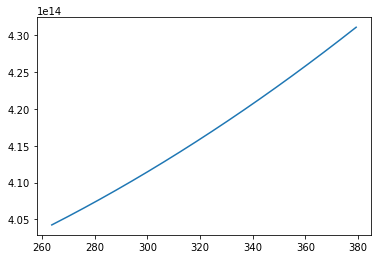

In [55]:
plt.plot(RSS_for_new_penalties["alpha"], RSS_for_new_penalties["RSS"])